# Case study

## Import libraries

In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

## Import dataset

In [106]:
path = "C:/Users/julia/Downloads/CardioGoodFitness.csv"
cardio = pd.read_csv(path)
cardio

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


## Organize the data

In [107]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [108]:
object_col = cardio.select_dtypes('object').columns
for i in object_col:
  print(cardio.loc[:,i].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
Male      104
Female     76
Name: Gender, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


## Visualize the dataset

there are 9 columns total, 6 columns are intergor type, the other 3 are object type

In [109]:
# plot the three object type distribution
px.bar(cardio[object_col])

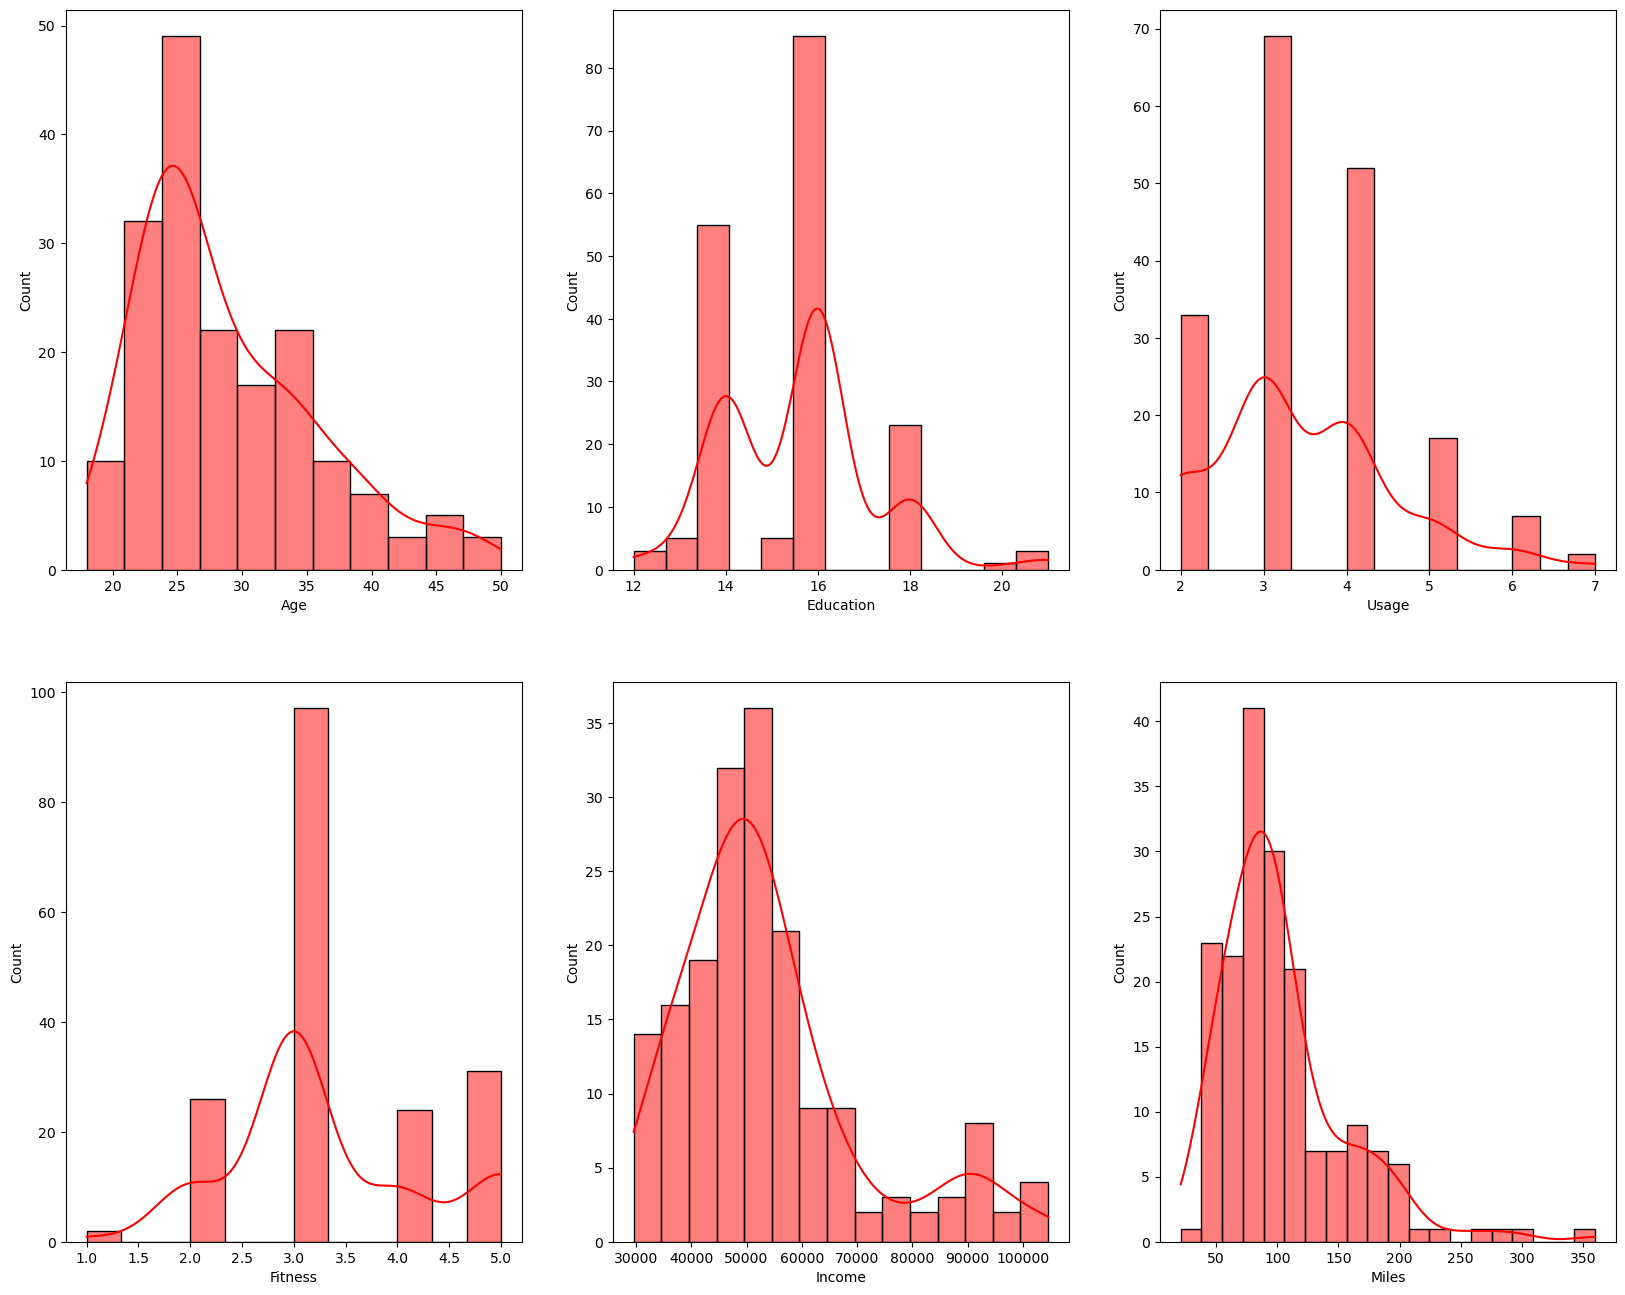

In [110]:
# plot the 6 columns which data is integor type
int_col = cardio.select_dtypes('int').columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 16))
axes = np.ravel(axes)
for i, j in enumerate(int_col):
  sns.histplot(data = cardio, x = j, ax = axes[i], kde = True, color = 'red')
plt.show()

In [111]:
# the descriptive of the numerical variables 
cardio[int_col].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


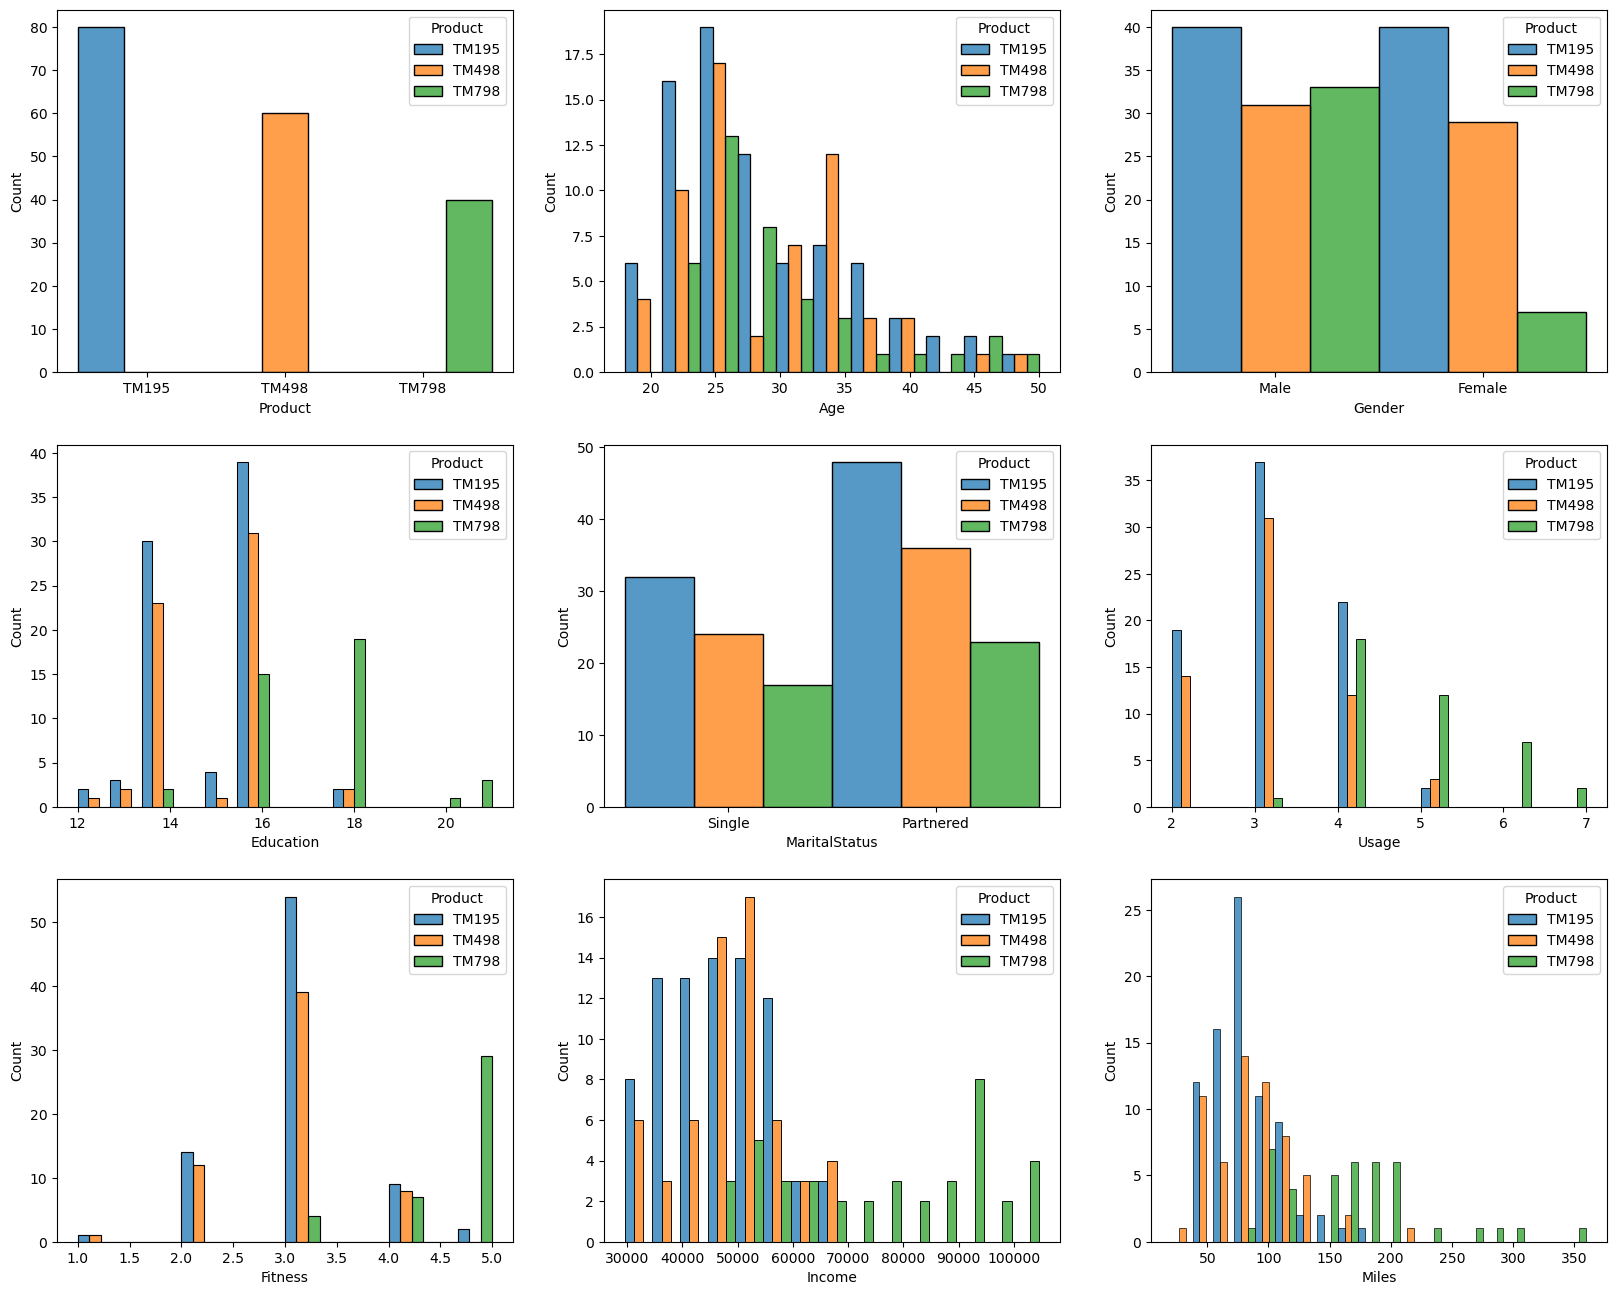

In [112]:
# check all distributions of variables arrording to products  
fig, axes = plt.subplots(3,3, figsize = (20, 16))
# the first plots just show the three products counts
axes = np.ravel(axes)
for i, j in enumerate(cardio.columns):
  sns.histplot(data =  cardio, x = j, ax= axes[i], hue = 'Product', multiple = 'dodge')
plt.show()


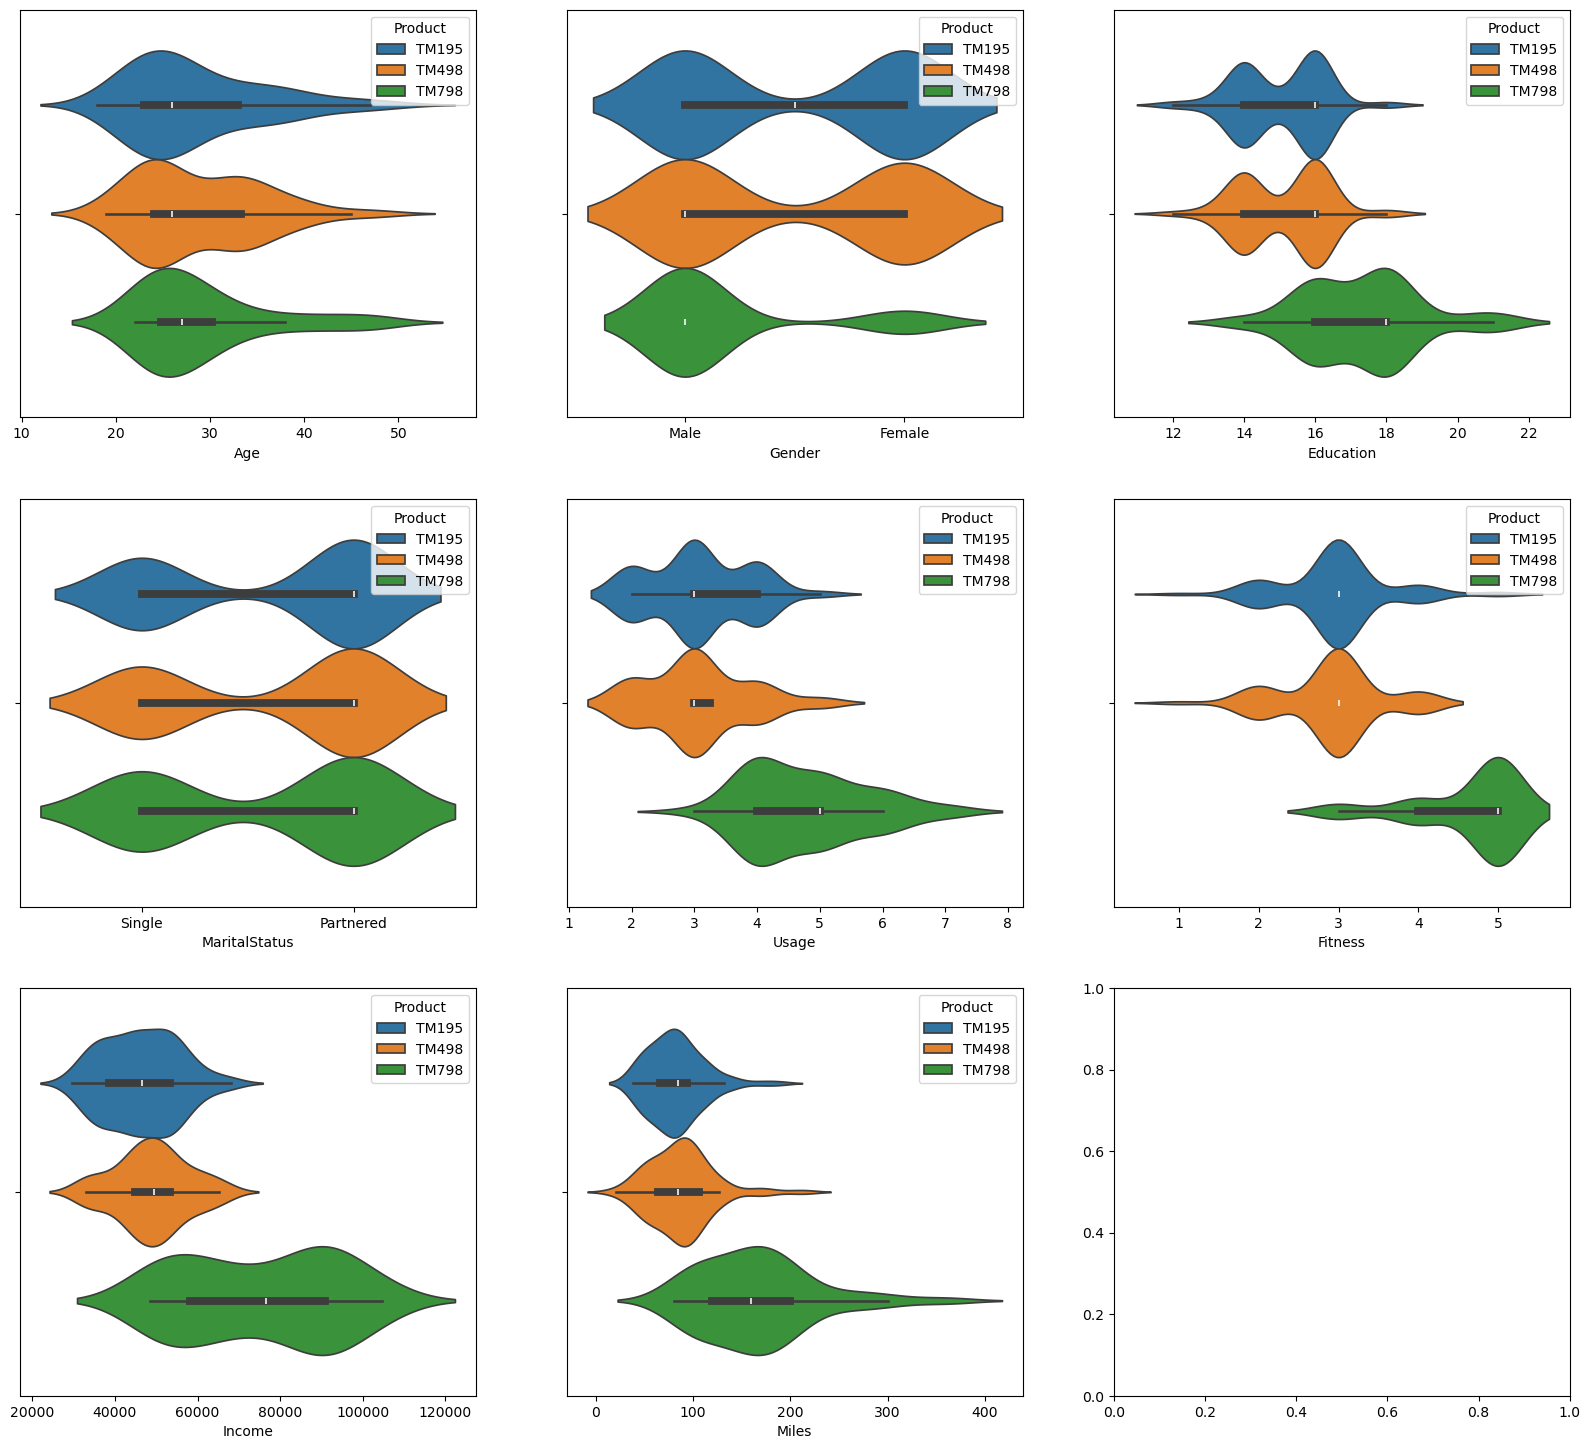

In [113]:
# using box plots to show the density of distributions of variables according to products
fig, axes = plt.subplots(3,3, figsize= (20,18))
axes = np.ravel(axes)
for i, j in enumerate(cardio.columns[1:]):
  sns.violinplot(data = cardio, x = j, hue = 'Product', ax = axes[i])
plt.show()


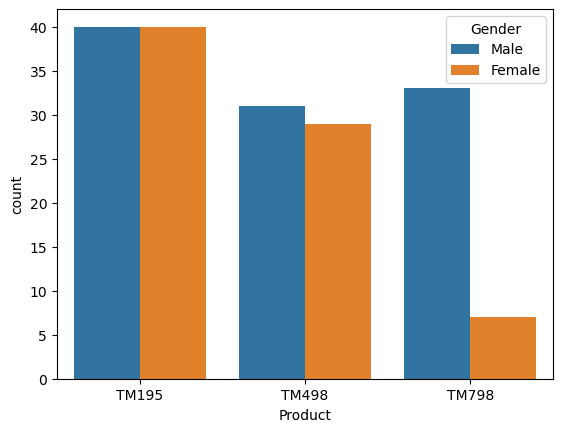

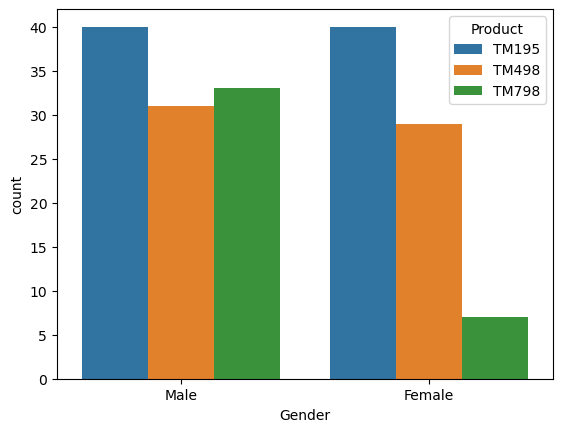

In [114]:
# which product is more pooular among males  or formales 
# using countplot

sns.countplot(data = cardio, x = 'Product', hue = 'Gender')
plt.show()

sns.countplot(data = cardio, x = 'Gender', hue = 'Product')
plt.show()

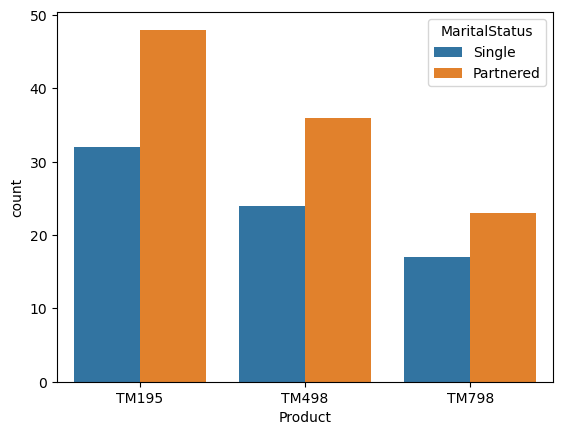

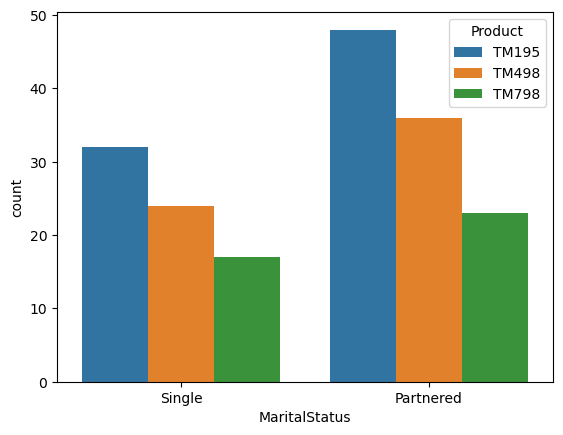

In [115]:
# is the product purchase affected by the marital status of the customer
sns.countplot(data = cardio, x= 'Product', hue = 'MaritalStatus')
plt.show()
sns.countplot(data = cardio, x = 'MaritalStatus', hue = 'Product')
plt.show()

 ## Check the correlation among the variables


In [116]:
# # transform the category type to numerical type
# le = LabelEncoder()
# cardio1 = cardio.copy()
# cardio1[object_col] = cardio1[object_col].apply(le.fit_transform)
# cardio1

In [117]:
# manually tranform category to int type
cardio2 = cardio.copy()
dic = {'TM195': 2,
       'TM498':1,
       'TM798':0
       }
cardio2['Product'] = cardio2['Product'].replace(dic)
dict1 = {
  'Female': 0,
  'Male': 1,
  'Single': 0,
  'Partnered': 1
}

In [118]:
cardio2[['MaritalStatus', 'Gender']] = cardio2[['MaritalStatus', 'Gender']].replace(dict1)
cardio2

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,2,18,1,14,0,3,4,29562,112
1,2,19,1,15,0,2,3,31836,75
2,2,19,0,14,1,4,3,30699,66
3,2,19,1,12,0,3,3,32973,85
4,2,20,1,13,1,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,0,40,1,21,0,6,5,83416,200
176,0,42,1,18,0,5,4,89641,200
177,0,45,1,16,0,5,5,90886,160
178,0,47,1,18,1,4,5,104581,120


<Axes: >

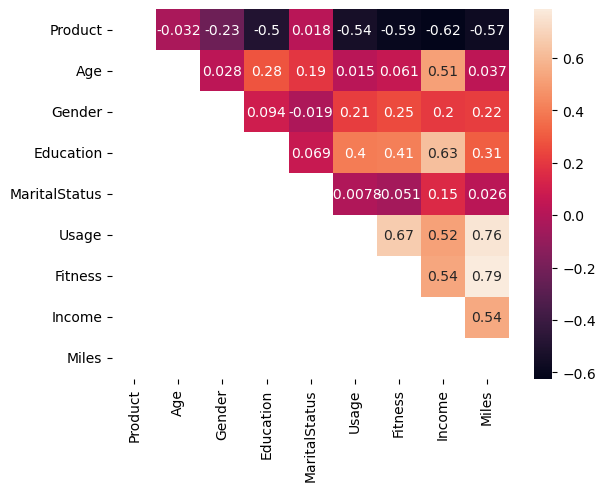

In [146]:
# check the correlation of all vaiables
cor_matrix = cardio2.corr()
one_matrix = np.ones_like(cor_matrix)
mask = np.tril(one_matrix, k = 0)
sns.heatmap(data = cor_matrix, annot = True, mask = mask)

In [177]:
# find the max correlation of correlation matrix 
low_corr = np.tril(cor_matrix, k = -1) # low_corr is already become A numpy
max_corr = np.abs(low_corr).max()

# find the two variable which is significantly related
cond = np.abs(low_corr) == max_corr
i_variable = np.where(cond)[0][0]
j_variable = np.where(cond)[1][0]
print(cardio2.columns[i_variable],'and', cardio2.columns[j_variable],'are closely related')

Miles and Fitness are closely related


## Distribution of the average number of miles for each product

In [180]:
cardio2.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

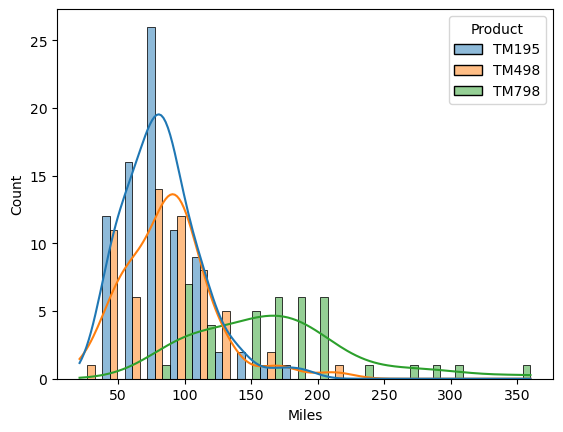

In [191]:
# distribution plots of miles for each products
sns.histplot(data = cardio, x = 'Miles', hue = 'Product', multiple = 'dodge', kde = True)
plt.show()

In [194]:
cardio[['Miles','Product']].groupby(['Product']).mean()

,Miles
Product,
TM195,82.787500
TM498,87.933333
TM798,166.900000
